In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import sin, cos, linspace, pi
from scipy.integrate import odeint, solve_bvp, solve_ivp
import numpy as np
%matplotlib inline

In [91]:
def fvdp1(t,y):
    dy1 = y[1]      # y[1]=dy/dt，一阶导
    dy2 = -(y[0]**3 + 3/1000000000000000**y[0]**2 + 3*y[1]*np.sqrt(1/4*y[0]**4 + 1/1000000000000000*y[0]**3 + 1/2*y[1]**2)) 
    return [dy1,dy2] 
def solve_second_order_ode():
    t2 = linspace(0,100,100000)
    tspan = (0.0, 100.0)
    y0 = [1, 1] 
    y = odeint(fvdp1, y0, t2, tfirst=True)
    y_ = solve_ivp(fvdp1, t_span=tspan, y0=y0, t_eval=t2)
    
    #l1, = plt.plot(t2,y[:,0],label='y(0)')

    

    l3, = plt.plot(y_.t, y_.y[0,:],'g--',label='y(0)')
    plt.show()

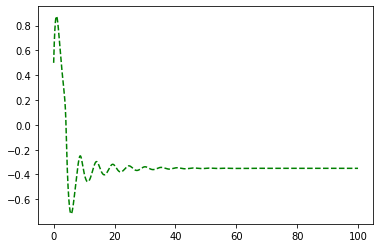

In [92]:
solve_second_order_ode()

In [13]:
def diffeq(x, t,k,g):

    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation for damped oscillation
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1]

    return dxdt

""" constants """
k=0.1
g=0.025

x    = np.array([2.0,-0.8])         # initial position
time = np.linspace(0.0,100.0,100)   # evaluation times

""" calling the solver """
solution = odeint(diffeq, x, time, args=(k,g))